In [23]:
import pandas as pd
from path import Path
import hvplot.pandas
import numpy as np

In [9]:
df_home_sales = pd.read_csv(
    Path("01-Seasonal_Patterns/national-home-sales.csv"), 
    index_col="period_end_date", 
    parse_dates=True, 
    infer_datetime_format=True)
df_home_sales

,inventory,homes_sold,median_sale_price
period_end_date,,,
2020-01-01,1250798,377964,289000
2020-02-01,1265253,405992,294000
2020-03-01,1316823,507324,303000
2020-04-01,1297460,436855,304000
2020-05-01,1289500,421351,299000
...,...,...,...
2019-08-01,1660309,627929,296000
2019-09-01,1651469,532688,292000
2019-10-01,1598498,543858,293000


<AxesSubplot:>

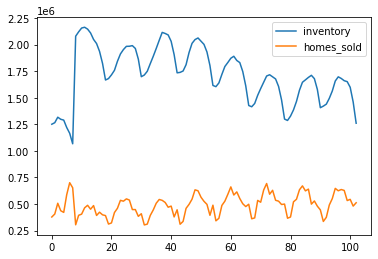

In [4]:
# Plot the inventory and homes_sold series
df_home_sales[["inventory", "homes_sold"]].plot()

<AxesSubplot:title={'center':'Homes Sold in 2014'}, xlabel='period_end_date'>

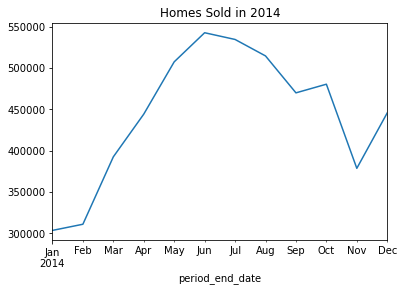

In [14]:
# Plot 2014 home sales data
df_home_sales.loc["2014"]["homes_sold"].plot(title="Homes Sold in 2014")

In [13]:
df_home_sales["homes_sold"].groupby(by=[df_home_sales.index.quarter]).sum()

period_end_date
1    10081561
2    14788243
3    14518462
4    11126303
Name: homes_sold, dtype: int64

In [16]:
quarterly_sales_per_year = df_home_sales["homes_sold"].groupby(by=[df_home_sales.index.year, df_home_sales.index.quarter]).sum()
quarterly_sales_per_year

period_end_date  period_end_date
2012             1                   698771
                 2                  1357167
                 3                  1329120
                 4                  1212750
2013             1                  1053470
                 2                  1521401
                 3                  1533894
                 4                  1240531
2014             1                  1006881
                 2                  1494496
                 3                  1519277
                 4                  1304816
2015             1                  1105378
                 2                  1676173
                 3                  1714455
                 4                  1379792
2016             1                  1194478
                 2                  1779674
                 3                  1750930
                 4                  1476636
2017             1                  1264554
                 2                  1841266

<AxesSubplot:xlabel='period_end_date,period_end_date'>

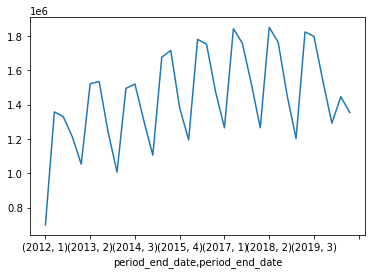

In [17]:
# Plot total quarterly home sales per year
quarterly_sales_per_year.plot()

In [24]:
# Plot quarterly home sales per year using a heatmap
df_home_sales.hvplot.heatmap(
    x="index.year",
    y="index.quarter",
    C="homes_sold",
    cmap="blues"
).aggregate(function=np.mean)

:HeatMap   [index.year,index.quarter]   (homes_sold)

In [25]:
# Compute the correlation between "inventory" and "homes_sold"
df_home_sales[["inventory", "homes_sold"]].corr()

,inventory,homes_sold
inventory,1.000000,-0.006937
homes_sold,-0.006937,1.000000
